# Principal Component Analysis

I will drop the nominal variables, but keep ordinal variables where the distance between values seems relatively clear and uniform, such as 'employment_length' and 'sub_grade'

## Preprocessing and Transformation:

**Import Libraries:**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.under_sampling import RandomUnderSampler

**Load Data:**

In [2]:
loans_df = pd.read_pickle('cleaner_loans_df.pkl')

**Remove Categorical Variables (Only nominal, keeping ordinals that have integer encodings):**

In [3]:
print("\n\nVisualizing unique values for categorical variables")
for col in loans_df.dtypes[loans_df.dtypes!='float64'].index.tolist():
    if not col in['issue_d', 'earliest_cr_line']:
        print("\n", col)
        print(loans_df[col].unique())



Visualizing unique values for categorical variables

 term
[' 36 months' ' 60 months']

 sub_grade
[13 10  8 25 12  6  5  1  9 11 21  3 22 14  0 18 27 15  7 17 19  4 26 23
 16 20 29 24  2 31 30 32 33 28 34]

 emp_length
[11  4  5  7  8  9  3  6 10  1  2  0]

 home_ownership
['MORTGAGE' 'RENT' 'OWN' 'ANY']

 verification_status
['Not Verified' 'Source Verified' 'Verified']

 purpose
['debt_consolidation' 'small_business' 'home_improvement' 'major_purchase'
 'credit_card' 'other' 'house' 'vacation' 'car' 'medical' 'moving'
 'renewable_energy' 'wedding']

 addr_state
['PA' 'SD' 'IL' 'GA' 'MN' 'SC' 'RI' 'NC' 'CA' 'VA' 'AZ' 'IN' 'MD' 'NY'
 'TX' 'KS' 'NM' 'AL' 'WA' 'OH' 'LA' 'FL' 'CO' 'MI' 'MO' 'DC' 'MA' 'WI'
 'HI' 'VT' 'NJ' 'DE' 'TN' 'NH' 'NE' 'OR' 'CT' 'AR' 'NV' 'WV' 'MT' 'WY'
 'OK' 'KY' 'MS' 'UT' 'ND' 'ME' 'AK' 'ID' 'IA']

 initial_list_status
['w' 'f']

 application_type
['Individual' 'Joint App']

 disbursement_method
['Cash' 'DirectPay']

 credit_age
[ 4505  5844  5600 ... 20943 2401

In [4]:
loans_df = loans_df.drop(['term', 'home_ownership', 'verification_status', 
                          'purpose', 'addr_state', 'initial_list_status', 
                          'application_type', 'disbursement_method'], axis=1)

**Separating Target Variable:**

In [5]:
X = loans_df.drop(['default'], axis=1)
y = loans_df[['default']]

**Statified Sampling and Undersampling Majority Class**

In [6]:
splitter=StratifiedShuffleSplit(n_splits=1, random_state=12, test_size=0.20)
for train,test in splitter.split(X,y):
    X_train_imbal = X.iloc[train] # x train without balancing
    y_train_imbal = y.iloc[train] # y train without balancing
    X_test = X.iloc[test]
    y_test = y.iloc[test]
print(y_train_imbal.value_counts())
print(y_test.value_counts())

undersample = RandomUnderSampler(random_state=12)
X_train, y_train = undersample.fit_resample(X_train_imbal, y_train_imbal)
print(y_train.value_counts())

default
False      805920
True       204041
Name: count, dtype: int64
default
False      201481
True        51010
Name: count, dtype: int64
default
False      204041
True       204041
Name: count, dtype: int64


**Creating Train and Test Splits:**

In [7]:
# # Splitting the X and Y into the Training set and Testing set 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Normalizing Data:**

In [8]:
# performing preprocessing
scaler = StandardScaler()
 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# MinMaxScaler returns a Numpy nd-array, so convert train and test target labels into Numpy arrays for consistency
y_train = np.array(y_train).flatten()
y_test = np.array(y_test).flatten()

**PCA Transformation:**

In [9]:
# choose the minimum number of components such that 95% of the variance is retained
pca = PCA(.70, random_state=52) 

# fit PCA on the training set
pca.fit(X_train)

# apply the transform to both the training and test sets
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

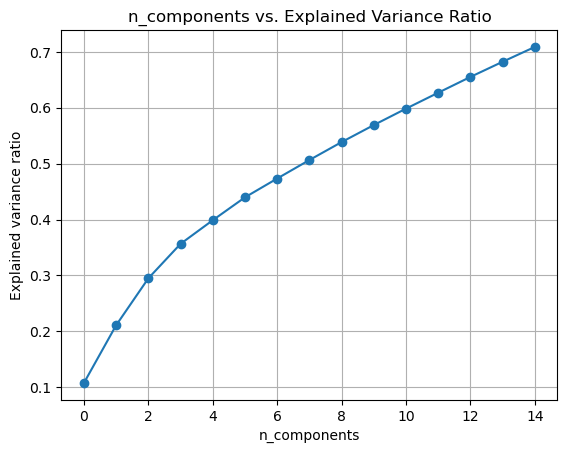

In [10]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

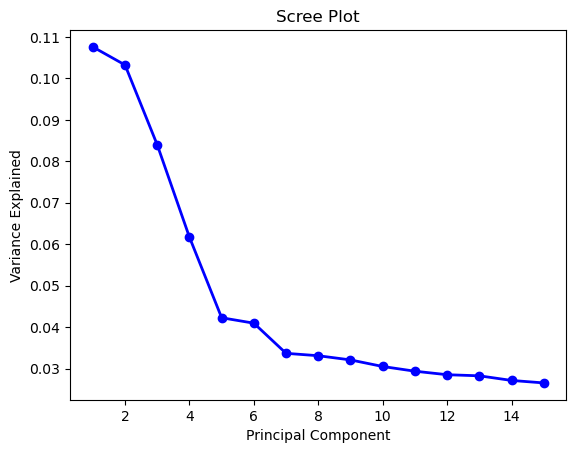

In [11]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [12]:
print(pca.explained_variance_ratio_)

[0.10759568 0.1032426  0.08397284 0.06170165 0.0422596  0.04094697
 0.03367605 0.03309725 0.0320872  0.03050097 0.02936209 0.02851606
 0.02825154 0.02713637 0.02653594]


**Loadings Dataframe:**

In [13]:
# Principal components correlation coefficients
loadings = pca.components_

# Number of principal components
n_components = loadings.shape[0]

# Feature names before PCA
feature_names = X.columns.values

# PC names
pc_list = [f'PC{i}' for i in range(1, n_components + 1)]

# Transpose the loadings to align rows with features and columns with PCs
loadings_transposed = loadings.T

# Create DataFrame with transposed loadings
loadings_df = pd.DataFrame(loadings_transposed, columns=pc_list, index=feature_names)

loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
installment,0.107144,0.169965,0.189351,0.110737,-0.196557,-0.023291,0.090267,-0.008887,-0.177523,0.175401,0.056602,0.290646,0.025339,-0.169837,0.035537
sub_grade,0.111484,-0.041412,-0.166940,0.378674,-0.105411,0.080192,0.169558,-0.074729,-0.135780,0.051458,0.050133,0.106724,0.048186,-0.086971,-0.062233
emp_length,0.060133,0.045563,0.094329,0.008836,-0.202647,-0.029668,-0.051607,0.005192,0.138548,-0.357431,0.288330,0.323982,-0.067296,-0.117836,-0.671355
annual_inc,0.132711,0.143852,0.216189,-0.032095,-0.216934,0.124556,-0.068102,0.141283,-0.027042,0.297795,-0.121090,0.258775,-0.154750,-0.095292,0.066645
dti,0.055665,0.087588,-0.015856,0.231224,0.373854,-0.109747,0.076535,-0.134221,0.024828,-0.328212,0.213001,-0.141763,0.191639,0.073257,0.125992
delinq_2yrs,0.208808,-0.195760,0.106948,-0.067758,0.056791,-0.054314,0.225014,0.080922,-0.164361,-0.036036,0.064042,0.045879,-0.214283,0.184525,0.047739
fico_range_low,-0.164861,0.202576,0.115298,-0.424625,0.110693,0.118553,0.018280,0.007690,-0.129167,-0.059587,0.072550,-0.046770,0.095834,-0.028655,-0.038320
inq_last_6mths,0.173394,0.066342,-0.194636,0.024068,-0.204651,0.351483,0.234730,-0.334425,-0.199838,-0.024626,-0.020691,-0.086105,0.077815,0.024727,0.010077
mths_since_last_delinq,-0.308780,0.265070,-0.097911,0.075434,-0.029855,0.065715,-0.014305,-0.044413,0.093042,0.083820,0.044144,-0.092129,0.018413,-0.111055,-0.016980
open_acc,0.259323,0.281762,-0.021423,-0.014607,0.243836,-0.221558,0.072667,-0.191415,0.025520,-0.028784,-0.070168,0.071813,-0.083226,-0.020350,-0.097556


## Apply Models to Transformed Data

### Logistic Regression:

In [14]:
from sklearn.linear_model import LogisticRegression

from sklearn import neighbors, tree, naive_bayes
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import precision_score, make_scorer, roc_auc_score

import graphviz
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn import decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, PrecisionRecallDisplay

Overall Accuracy on X-Val: 0.63 (+/- 0.00)
Test ROC AUC Score: 0.6761585268964128
Test PR AUC Score: 0.333722570404685
-------------------------------------------------------
Classification Report on Test Set:
-------------------------------------------------------
              precision    recall  f1-score   support

       False       0.87      0.60      0.71    201481
        True       0.29      0.65      0.41     51010

    accuracy                           0.61    252491
   macro avg       0.58      0.63      0.56    252491
weighted avg       0.76      0.61      0.65    252491

-------------------------------------------------------
Classification Report on Train Set:
-------------------------------------------------------
              precision    recall  f1-score   support

       False       0.63      0.61      0.62    204041
        True       0.62      0.65      0.64    204041

    accuracy                           0.63    408082
   macro avg       0.63      0.63      0.

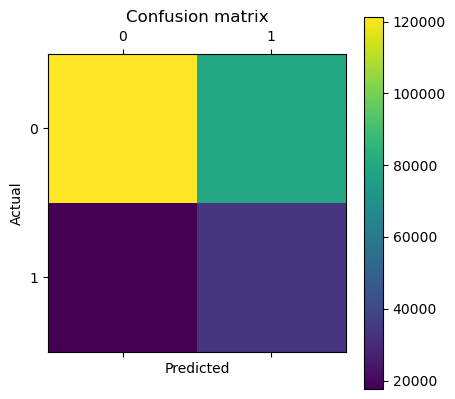

In [15]:
# Create Decision Tree classifer object
logisticRegr = LogisticRegression(solver = 'lbfgs')

# Run 5-fold CV and print results
cv_scores = cross_val_score(logisticRegr, X_train, y_train, cv=5)
print("Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

# Train Decision Tree Classifer
logisticRegr = logisticRegr.fit(X_train, y_train)

# Predict response for test and train sets
y_pred_test = logisticRegr.predict(X_test)

# Calculate and print ROC AUC score on test set
y_pred_proba = logisticRegr.predict_proba(X_test)[:,1] # necessary for ROC-AUC score
auroc_score = roc_auc_score(y_test, y_pred_proba)
aupr_score = average_precision_score(y_test, y_pred_proba, pos_label='True')
print("Test ROC AUC Score:", auroc_score)
print("Test PR AUC Score:", aupr_score)

# Classification Reports
print('-'*55)
print('Classification Report on Test Set:')
print('-'*55)
print(classification_report(y_test, y_pred_test))
y_pred_train = logisticRegr.predict(X_train)
print('-'*55)
print('Classification Report on Train Set:')
print('-'*55)
print(classification_report(y_train, y_pred_train))
print('-'*55)

# Create and plot confusion matrix
treecm = confusion_matrix(y_test, y_pred_test)
print(treecm)
plt.matshow(treecm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Create the base model to tune
rfclf = RandomForestClassifier(random_state=42)

param_dict = { 
    'criterion' :['gini', 'entropy'],
    'max_depth' : range(1,100,2),
    'min_samples_leaf':range(1,1000,50),
    'min_samples_split':range(2, 1000, 50),
    'n_estimators': range(1, 1000, 50),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

rs_prauc = RandomizedSearchCV(rfclf,
                  random_state=42,
                  param_distributions=param_dict, 
                  verbose=1, 
                  scoring="average_precision",
                  n_iter = 1000,
                  n_jobs = -1,
                  return_train_score=True,)

rs_prauc.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
